# **PROJETO INTEGRADO**

MBA em Data Science & AI - FIAP​

Applied Statistics​ - 10DTS

São Paulo, 25 de janeiro de 2025

**Membros**
- Lucas Nascimento dos Santos - RM 358024​
- Rafael Henrique Gallo – RM 358285​
- Rodrigo Patricio Carvalho - RM 358829​
- William Macedo Marcondes - RM 359572​

## **Descrição projeto**

A QuantumFinance está acompanhando um crescimento de inadimplência entre seus clientes e solicita a consultoria para desenvolver uma análise com base na sua carteira atual de clientes. Para que a QuantumFinance tome decisões mais precisas sobre concessões de crédito, ela precisa aprimorar seu modelo de crédito. Comoobjeto detrazer novos clientes com o perfil de baixo risco de crédito desenvolva um modelo de Credit Scoring. Desafio: Desenvolver o modelo preditivo mediante uso do valor target disponível na base de dados “Base_ScoreCredito_QuantumFinance.csv” e criar um simulador do modelo para os analistas de créditos e gerentes de conta.

**Dicionario**

- **ID:** Identificador único do cliente (não será usado diretamente no modelo).
- **Idade:** Analisar a distribuição e lidar com possíveis valores ausentes ou fora do padrão.
- **Sexo:** Variável categórica (ex.: transformar em valores binários: 0 - Feminino, 1 - Masculino).
- **Estado Civil:** Variável categórica (codificar ou criar categorias dummies, ex.: solteiro, casado, etc.).
- **Escola:** Analisar e transformar em ordinal, se possível (ex.: ensino fundamental, médio, superior).
- **Quantidade de Dependentes:** Tratar valores ausentes ou anômalos.
- **Tempo no Último Serviço:** Tratar valores ausentes e padronizar.
- **Trabalha:** Variável binária (ex.: 0 - Não, 1 - Sim).
- **Valor do Salário:** Normalizar, tratar outliers e valores faltantes.
- **Regime de Moradia:** Variável categórica (ex.: alugada, própria, financiada).
- **Casa Própria:** Variável binária (ex.: 0 - Não, 1 - Sim).
- **Valor do Imóvel:** Tratar valores ausentes e padronizar.
- **Quantidade de Cartões:** Tratar valores extremos.
- **Quantidade de Carros:** Tratar valores ausentes ou extremos.
- **Score de Crédito:** Variável *target* (provavelmente contínua ou categorizada).

## **Introdução**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df = pd.read_csv("/content/Base_ScoreCredito_QuantumFinance(2).csv", delimiter=';')

In [ ]:
df.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,"40,089665024322",3,0,0,1,1,778
1,708083283,58,M,solteiro,ensino fundam,0,44,1,"66,557645274838",3,0,0,1,0,"276,3"
2,708084558,46,M,divorciado,doutorado,3,35,1,"123,68182089138",6,0,0,1,1,401
3,708085458,34,F,solteiro,mestrado,0,22,1,"19,7159343168329",6,0,0,1,0,"347,4"
4,708086958,49,F,casado,mestrado,2,36,0,0,3,1,437,1,2,476


In [ ]:
df.tail()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
10122,828288333,50,M,casado,mestrado,0,45,1,"100,128970755",4,0,0,1,0,470
10123,828291858,38,M,solteiro,ensino fundam,0,31,1,"89,80599574656",6,0,0,1,1,432
10124,828294933,49,F,casado,graduacao,3,43,1,"19,7993057098452",3,1,252,1,1,406
10125,828298908,54,M,casado,ensino medio,4,48,1,"194,78317642784",4,0,0,1,1,387
10126,828343083,43,F,na,graduacao,4,36,1,"20,9257930255374",3,1,365,1,1,513


In [ ]:
df.shape

(10127, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10127 non-null  int64 
 1   idade                10127 non-null  int64 
 2   sexo                 10127 non-null  object
 3   estado_civil         10127 non-null  object
 4   escola               10127 non-null  object
 5   Qte_dependentes      10127 non-null  int64 
 6   tempo_ultimoservico  10127 non-null  int64 
 7   trabalha             10127 non-null  int64 
 8   vl_salario_mil       10127 non-null  object
 9   reg_moradia          10127 non-null  int64 
 10  casa_propria         10127 non-null  int64 
 11  vl_imovel_em_mil     10127 non-null  int64 
 12  Qte_cartoes          10127 non-null  int64 
 13  Qte_carros           10127 non-null  int64 
 14  SCORE_CREDITO        10127 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [ ]:
df.dtypes

,0
id,int64
idade,int64
sexo,object
estado_civil,object
escola,object
Qte_dependentes,int64
tempo_ultimoservico,int64
trabalha,int64
vl_salario_mil,object
reg_moradia,int64


## **Limpeza de dados**

In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

id                     0
idade                  0
sexo                   0
estado_civil           0
escola                 0
Qte_dependentes        0
tempo_ultimoservico    0
trabalha               0
vl_salario_mil         0
reg_moradia            0
casa_propria           0
vl_imovel_em_mil       0
Qte_cartoes            0
Qte_carros             0
SCORE_CREDITO          0
dtype: int64


In [ ]:
# Verificar duplicatas
print(f"Duplicatas: {df.duplicated().sum()}")

Duplicatas: 0


# **Pré-processamento**

In [ ]:
# Cópia dados
data = df.copy()

# Salvando dataset
data.to_csv("dataset.csv")

In [ ]:
# Remover caracteres não numéricos, como vírgulas e espaços
df['vl_salario_mil'] = df['vl_salario_mil'].str.replace(',', '.').str.strip()
df['SCORE_CREDITO'] = df['SCORE_CREDITO'].str.replace(',', '.').str.strip()

# Converter para Tipo Numérico
df['vl_salario_mil'] = pd.to_numeric(df['vl_salario_mil'], errors='coerce')
df['SCORE_CREDITO'] = pd.to_numeric(df['SCORE_CREDITO'], errors='coerce')

In [ ]:
# Remover linhas com valores ausentes
df = df.dropna(subset=['vl_salario_mil', 'SCORE_CREDITO'])

In [ ]:
# Remove coluna id
df.drop('id', axis=1, inplace=True)

## **Análise exploratória de dados**

In [ ]:
# Estatísticas descritivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,10127.0,46.325960,8.016814,26.0,41.000000,46.000000,52.000000,73.000000
Qte_dependentes,10127.0,1.547447,1.489079,0.0,0.000000,1.000000,3.000000,5.000000
tempo_ultimoservico,10127.0,34.133208,8.221428,7.0,30.000000,34.000000,39.000000,57.000000
trabalha,10127.0,0.911919,0.283427,0.0,1.000000,1.000000,1.000000,1.000000
vl_salario_mil,10127.0,70.209002,55.567032,0.0,21.330536,66.486331,107.544225,233.301793
reg_moradia,10127.0,3.783450,1.580486,1.0,3.000000,4.000000,5.000000,6.000000
casa_propria,10127.0,0.352424,0.477749,0.0,0.000000,0.000000,1.000000,1.000000
vl_imovel_em_mil,10127.0,208.999111,378.495229,0.0,0.000000,0.000000,289.000000,1800.000000
Qte_cartoes,10127.0,1.083638,0.333784,1.0,1.000000,1.000000,1.000000,4.000000
Qte_carros,10127.0,0.623383,0.569796,0.0,0.000000,1.000000,1.000000,2.000000


<Figure size 1500x800 with 0 Axes>

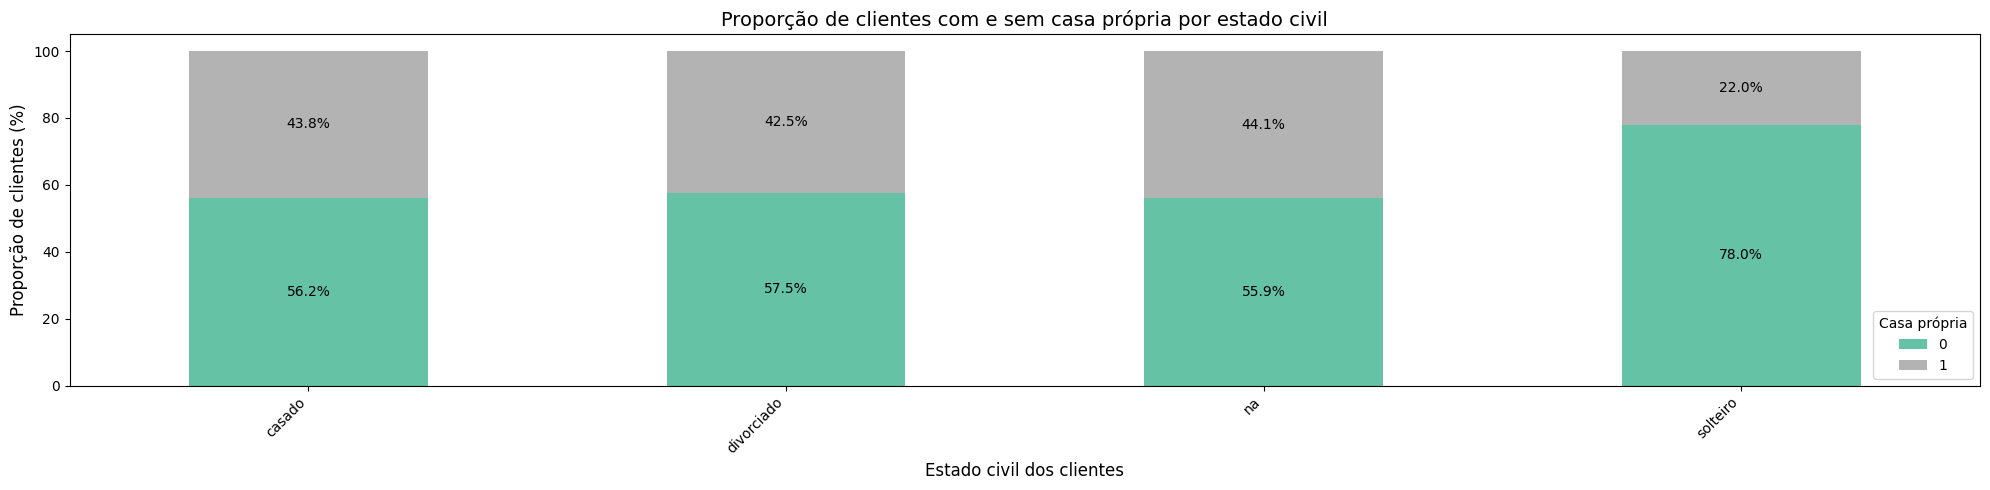

In [ ]:
# Gráfico sobe estado civil por clientes
cross_tab = pd.crosstab(df['estado_civil'], df['casa_propria'], normalize='index') * 100

plt.figure(figsize=(15, 8))
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(20, 5), colormap='Set2')

plt.title('Proporção de clientes com e sem casa própria por estado civil', fontsize=14)
plt.xlabel('Estado civil dos clientes', fontsize=12)
plt.ylabel('Proporção de clientes (%)', fontsize=12)
plt.legend(title='Casa própria', loc='lower right', fontsize=10)

# Adicionando os valores sobre as barras
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

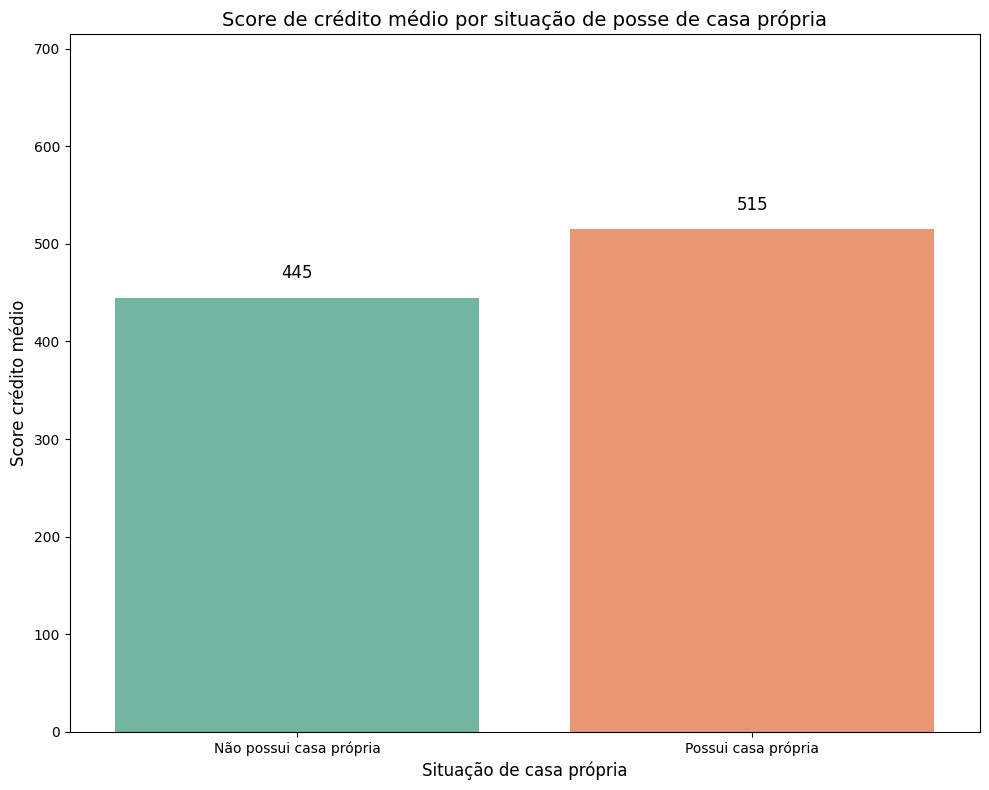

In [ ]:
# Agrupar dados por 'casa_propria'
grouped = df.groupby('casa_propria')['SCORE_CREDITO'].mean().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(data=grouped, x='casa_propria', y='SCORE_CREDITO', palette='Set2', hue='casa_propria', legend=False)

# Melhorar rótulos, título e escala
plt.title('Score de crédito médio por situação de posse de casa própria', fontsize=14)
plt.xlabel('Situação de casa própria', fontsize=12)
plt.ylabel('Score crédito médio', fontsize=12)
plt.xticks([0, 1], ['Não possui casa própria', 'Possui casa própria'], fontsize=10)

# Adicionar valores sobre as barras
for index, value in enumerate(grouped['SCORE_CREDITO']):
    plt.text(index, value + 20, f"{value:.0f}", ha='center', fontsize=12)

plt.ylim(0, grouped['SCORE_CREDITO'].max() + 200)
plt.tight_layout()
plt.show()

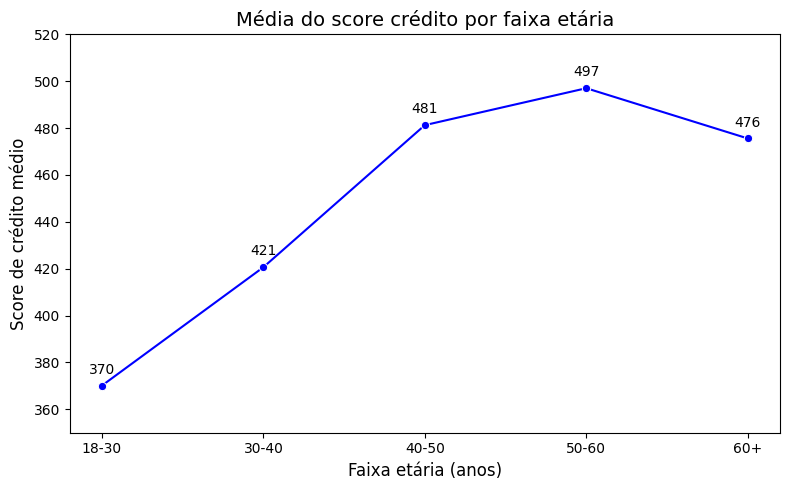

In [ ]:
# Gráfico média score crédito

# Criar a coluna faixa_idade
df['faixa_idade'] = pd.cut(df['idade'], bins=[18, 30, 40, 50, 60, 70],
                           labels=['18-30', '30-40', '40-50', '50-60', '60+'])

# Calcular a média do score por faixa etária
mean_score = df.groupby('faixa_idade', observed=True)['SCORE_CREDITO'].mean().reset_index()

# Gráfico de linha
plt.figure(figsize=(8, 5))
sns.lineplot(data=mean_score, x='faixa_idade', y='SCORE_CREDITO', marker='o', linestyle='-', color='blue')
plt.title('Média do score crédito por faixa etária', fontsize=14)
plt.xlabel('Faixa etária (anos)', fontsize=12)
plt.ylabel('Score de crédito médio', fontsize=12)

# Adicionar valores sobre os pontos
for x, y in zip(mean_score['faixa_idade'], mean_score['SCORE_CREDITO']):
    plt.text(x, y + 5, f"{y:.0f}", ha='center', fontsize=10, color='black')

plt.grid(visible=False)
plt.ylim(350, 520)
plt.tight_layout()
plt.show()

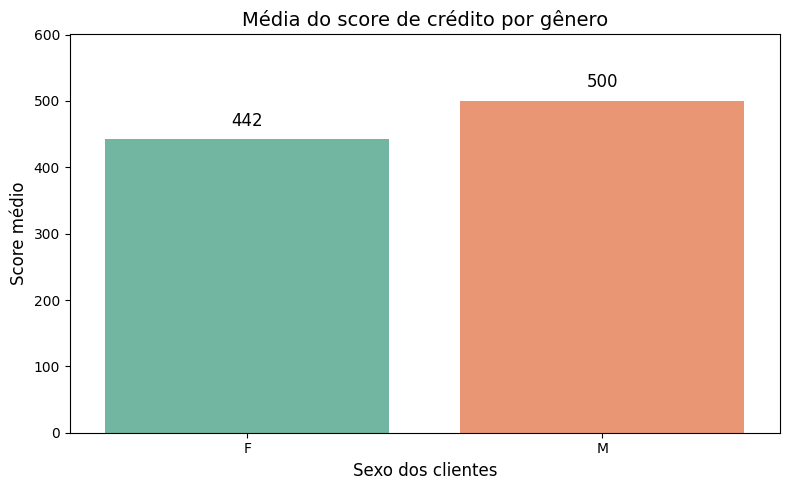

In [ ]:
# calcular média SCORE_CREDITO por Sexo
mean_score = df.groupby('sexo')['SCORE_CREDITO'].mean().reset_index()

# Plotar o gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=mean_score, x='sexo', y='SCORE_CREDITO', errorbar=None, palette='Set2', hue='sexo', legend=False)

# Melhorar título, rótulos e escala
plt.title('Média do score de crédito por gênero', fontsize=14)
plt.xlabel('Sexo dos clientes', fontsize=12)
plt.ylabel('Score médio', fontsize=12)
plt.ylim(0, mean_score['SCORE_CREDITO'].max() + 100)

# Adicionar valores sobre as barras
for index, value in enumerate(mean_score['SCORE_CREDITO']):
    plt.text(index, value + 20, f"{value:.0f}", ha='center', fontsize=12)

# Adicionar grade
plt.grid(visible=False)

plt.tight_layout()
plt.show()

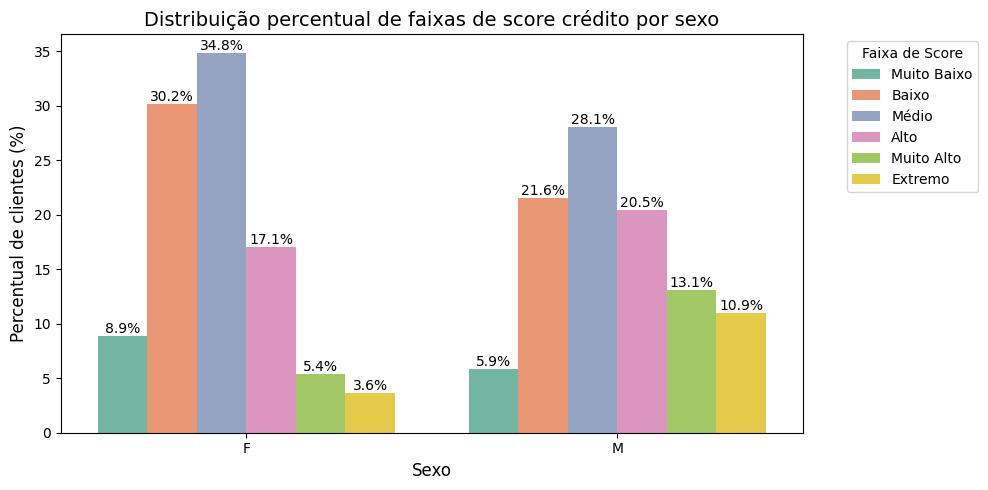

In [ ]:
# Ajustar faixas para o intervalo observado
df['faixa_score'] = pd.cut(df['SCORE_CREDITO'],
                           bins=[0, 300, 400, 500, 600, 700, 1000], # Ajuste conforme necessário
                           labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto', 'Extremo'],
                           include_lowest=True)

# Ordenar as faixas de score
df['faixa_score'] = pd.Categorical(df['faixa_score'],
                                   categories=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto', 'Extremo'],
                                   ordered=True)

# Calcular os percentuais
percentual = (df.groupby(['sexo', 'faixa_score'], observed=True).size().reset_index(name='count'))
percentual['percentual'] = (percentual.groupby('sexo', observed=True)['count'].transform(lambda x: 100 * x / x.sum()))

### Gráfico - Distribuição Percentual de Faixas de Score crédito por Sexo
# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(data=percentual, x='sexo', y='percentual', hue='faixa_score', palette='Set2')
plt.title('Distribuição percentual de faixas de score crédito por sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Percentual de clientes (%)', fontsize=12)

# Adicionar valores sobre as barras
for c in plt.gca().containers:
    plt.gca().bar_label(c, fmt='%.1f%%', label_type='edge', fontsize=10)

# Ajustar a posição da legenda
plt.legend(title='Faixa de Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

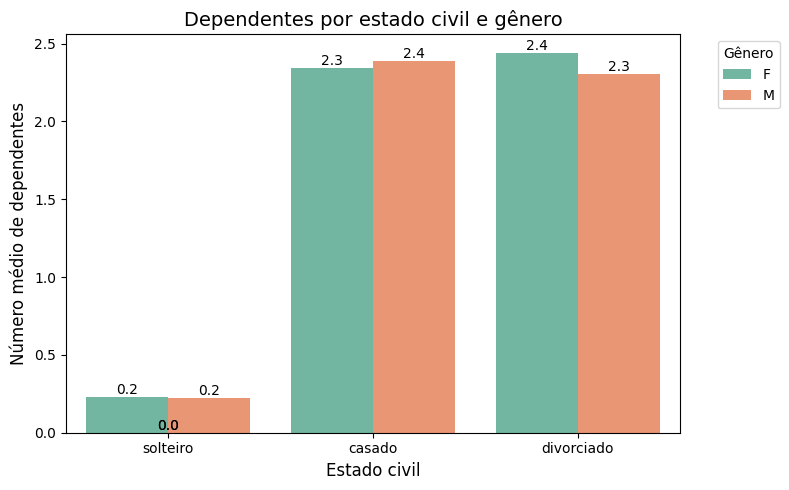

In [ ]:
# Gráfico Dependentes por Estado Civil e Gênero

plt.figure(figsize=(8, 5))
order = ['solteiro', 'casado', 'divorciado']
sns.barplot(data=df, x='estado_civil', y='Qte_dependentes', hue='sexo', order=order, palette='Set2', errorbar=None)
plt.title('Dependentes por estado civil e gênero', fontsize=14)
plt.xlabel('Estado civil', fontsize=12)
plt.ylabel('Número médio de dependentes', fontsize=12)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar valores sobre as barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.1f}",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.grid(False)
plt.show()

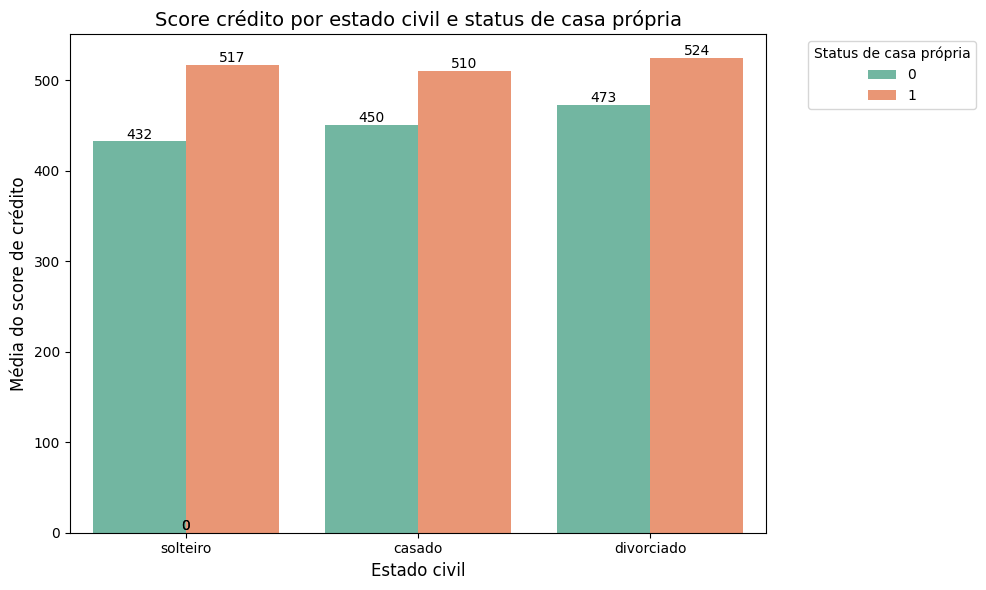

In [ ]:
# Gráfico SCORE_CREDITO por Estado Civil e Status de Casa Própria

# Ajustar o tamanho da figura
plt.figure(figsize=(10, 6))

order = ['solteiro', 'casado', 'divorciado']
sns.barplot(data=df, x='estado_civil', y='SCORE_CREDITO', hue='casa_propria', order=order, palette='Set2', errorbar=None)

# Melhorar os rótulos, título e legenda
plt.title('Score crédito por estado civil e status de casa própria', fontsize=14)
plt.xlabel('Estado civil', fontsize=12)
plt.ylabel('Média do score de crédito', fontsize=12)
plt.legend(title='Status de casa própria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar valores sobre as barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Adicionar linhas de grade
plt.grid(visible=False)

plt.tight_layout()
plt.show()

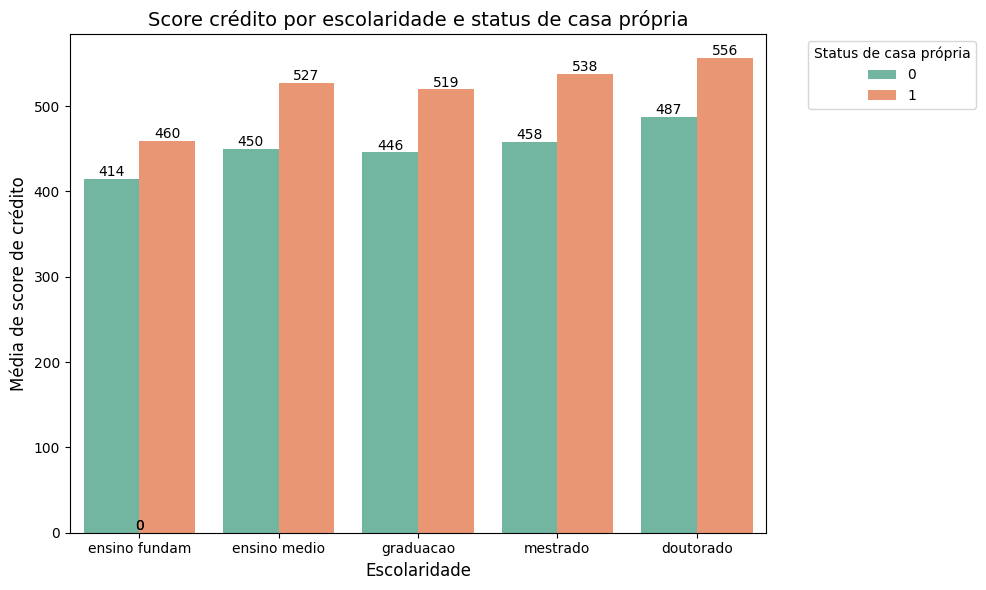

In [ ]:
# Gráfico Média de Score crédito por Escolaridade e Status de Casa Própria
plt.figure(figsize=(10, 6))

# Reordenar categorias no eixo X
order = ['ensino fundam', 'ensino medio', 'graduacao', 'mestrado', 'doutorado']

# Gráfico com melhorias
sns.barplot(data=df, x='escola', y='SCORE_CREDITO', hue='casa_propria', errorbar=None, order=order, palette='Set2')

# Melhorar os rótulos, título e legenda
plt.title('Score crédito por escolaridade e status de casa própria', fontsize=14)
plt.xlabel('Escolaridade', fontsize=12)
plt.ylabel('Média de score de crédito', fontsize=12)
plt.legend(title='Status de casa própria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar valores sobre as barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Adicionar linhas de grade
plt.grid(False)

plt.tight_layout()
plt.show()


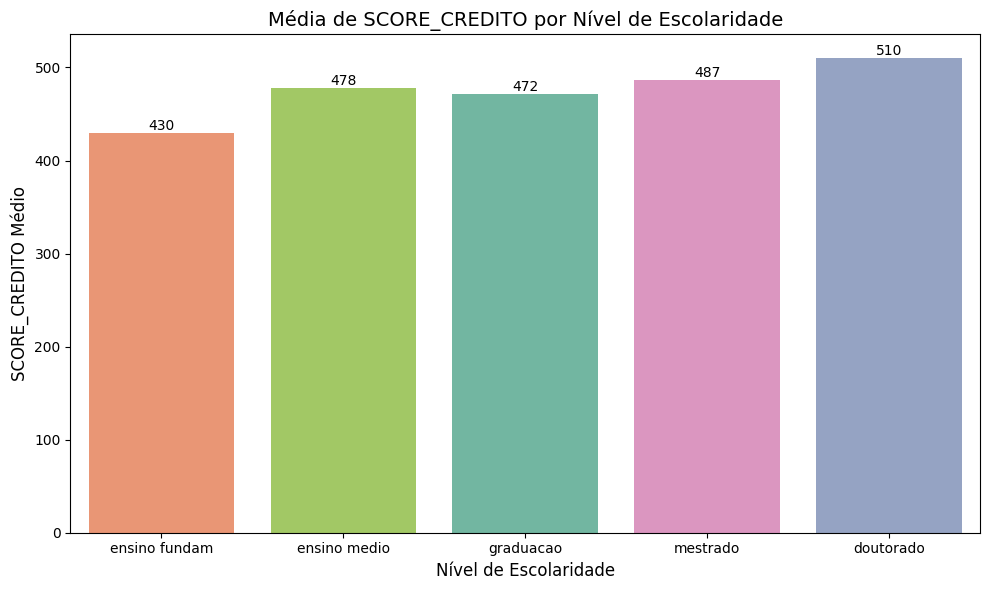

In [ ]:
# Gráfico - Média score credito por Nível de Escolaridade

# Reordenar categorias no eixo X
order = ['ensino fundam', 'ensino medio', 'graduacao', 'mestrado', 'doutorado']

# Gráfico com melhorias
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='escola', y='SCORE_CREDITO', order=order, hue='escola', errorbar=None, palette='Set2')

# Melhorar os rótulos, título e legenda
plt.title('Média de SCORE_CREDITO por Nível de Escolaridade', fontsize=14)
plt.xlabel('Nível de Escolaridade', fontsize=12)
plt.ylabel('SCORE_CREDITO Médio', fontsize=12)

# Adicionar valores sobre as barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Adicionar linhas de grade
plt.grid(False)

plt.tight_layout()
plt.show()

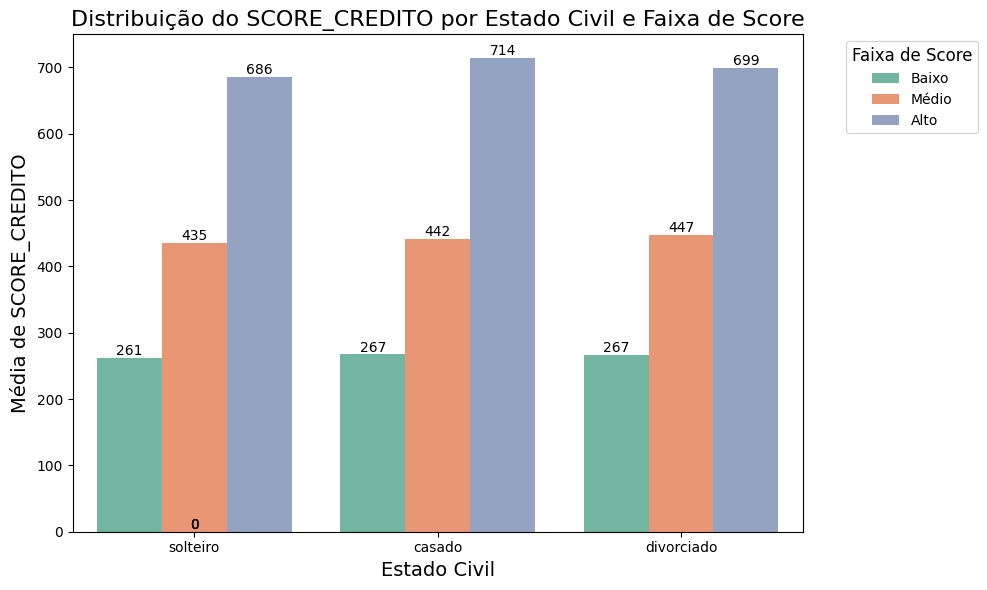

In [ ]:
# Coluna faixa_score com base nos valores de SCORE_CREDITO
bins = [0, 300, 600, df['SCORE_CREDITO'].max()]  # Limites para as faixas
labels = ['Baixo', 'Médio', 'Alto']  # Categorias
df['faixa_score'] = pd.cut(df['SCORE_CREDITO'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 6))

# Barplot
sns.barplot(data=df, x='estado_civil', y='SCORE_CREDITO', hue='faixa_score', errorbar=None, palette='Set2', order=['solteiro', 'casado', 'divorciado'])

# Títulos e rótulos
plt.title('Distribuição do SCORE_CREDITO por Estado Civil e Faixa de Score', fontsize=16)
plt.xlabel('Estado Civil', fontsize=14)
plt.ylabel('Média de SCORE_CREDITO', fontsize=14)

# Adicionar valores sobre as barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Melhorar a legenda
plt.legend(title='Faixa de Score', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout
plt.tight_layout()
plt.show()

# **Indicadores**

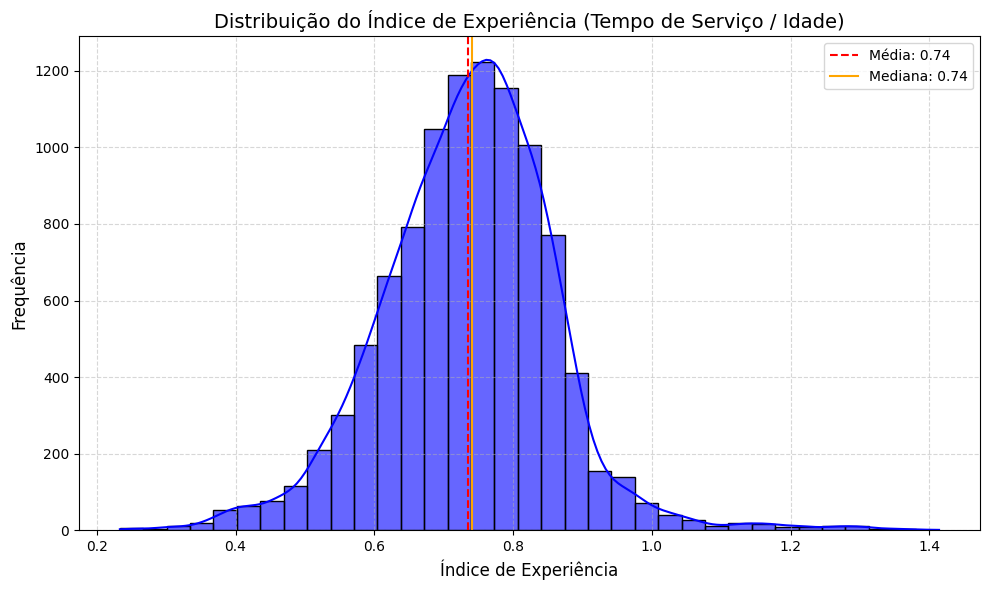

In [ ]:
# Gráfico para o Índice de Experiência
df['indice_experiencia'] = df['tempo_ultimoservico'] / df['idade']

# Gráfico para o Índice de Experiência
plt.figure(figsize=(10, 6))

# Histogram plot
sns.histplot(df['indice_experiencia'], bins=35, kde=True, color='blue', alpha=0.6)

# Média e mediana
media = df['indice_experiencia'].mean()
mediana = df['indice_experiencia'].median()
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(mediana, color='orange', linestyle='-', label=f'Mediana: {mediana:.2f}')

# Ajustes no layout
plt.title('Distribuição do Índice de Experiência (Tempo de Serviço / Idade)', fontsize=14)
plt.xlabel('Índice de Experiência', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


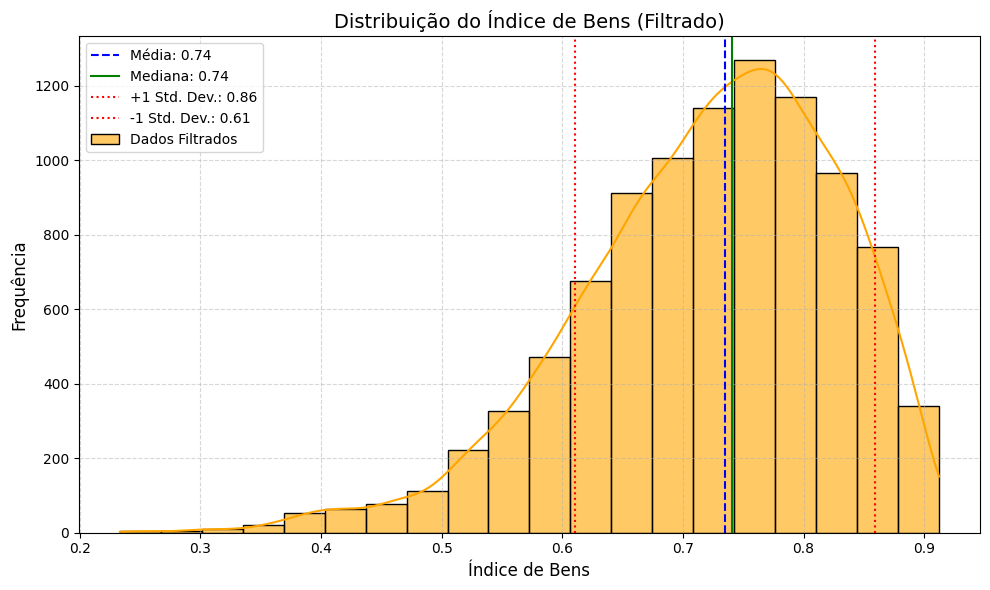

In [ ]:
# Gráfico para o Índice de Bens
df['indice_bens'] = df['tempo_ultimoservico'] / df['idade']

# Calcular estatísticas básicas
media = df['indice_bens'].mean()
mediana = df['indice_bens'].median()
desvio_padrao = df['indice_bens'].std()

plt.figure(figsize=(10, 6))
sns.histplot(df[df['indice_bens'] < df['indice_bens'].quantile(0.95)]['indice_bens'],
             bins=20, kde=True, color='orange', alpha=0.6, label='Dados Filtrados')

# linhas para a média e mediana
plt.axvline(media, color='blue', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f}')
plt.axvline(media + desvio_padrao, color='red', linestyle=':', label=f'+1 Std. Dev.: {media + desvio_padrao:.2f}')
plt.axvline(media - desvio_padrao, color='red', linestyle=':', label=f'-1 Std. Dev.: {media - desvio_padrao:.2f}')

# título e rótulos
plt.title('Distribuição do Índice de Bens (Filtrado)', fontsize=14)
plt.xlabel('Índice de Bens', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

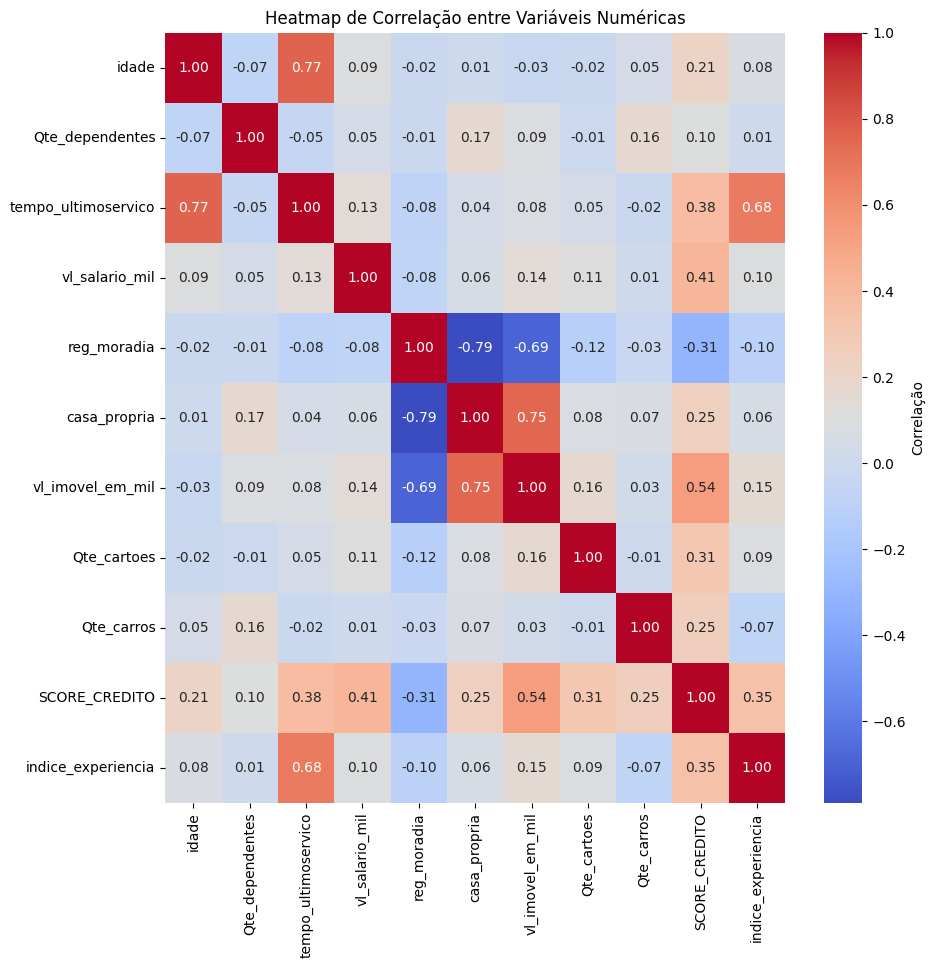

In [ ]:
# Identificar variáveis categóricas e numéricas
categoricas = ['sexo', 'estado_civil', 'escola', 'faixa_idade', 'faixa_score']
numericas = ['idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil',
             'reg_moradia', 'casa_propria', 'vl_imovel_em_mil', 'Qte_cartoes',
             'Qte_carros', 'SCORE_CREDITO', 'indice_experiencia']

# Matriz de correlação para variáveis numéricas
corr_numericas = df[numericas].corr()

# Plotar o heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_numericas, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlação'})
plt.title('Heatmap de Correlação entre Variáveis Numéricas')
plt.show()

# **Análise correlação**

- idade x tempo_ultimoservico = **0.77 correlação positiva**

- casa_propria x vl_imovel_em_mil = **0.75 correlação positiva**



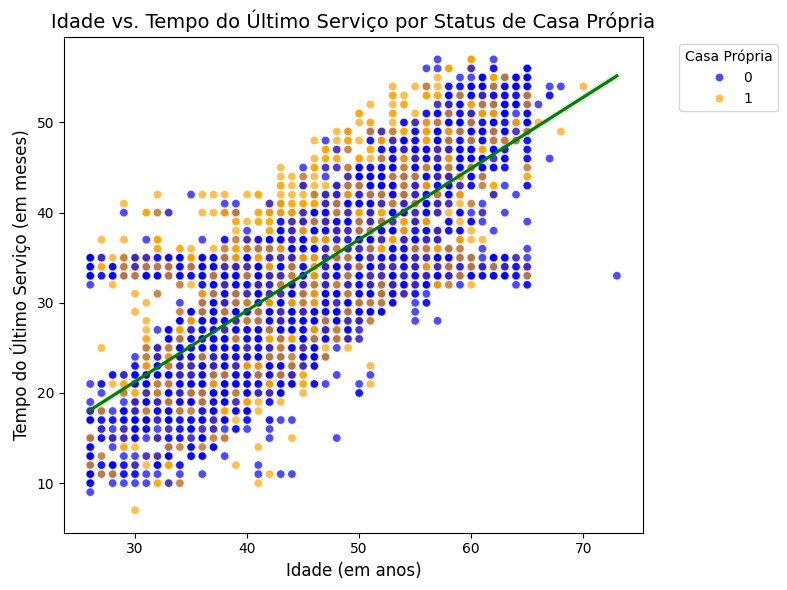

In [ ]:
# Resultado da correlação positiva
plt.figure(figsize=(8, 6))

# Scatterplot com cores ajustadas e linha de tendência
sns.scatterplot(data=df, x='idade', y='tempo_ultimoservico', hue='casa_propria', palette={0: 'blue', 1: 'orange'}, alpha=0.7)
sns.regplot(data=df, x='idade', y='tempo_ultimoservico', scatter=False, color='green', line_kws={'label': 'Tendência'})

# Melhorias nos rótulos, título e legenda
plt.title('Idade vs. Tempo do Último Serviço por Status de Casa Própria', fontsize=14)
plt.xlabel('Idade (em anos)', fontsize=12)
plt.ylabel('Tempo do Último Serviço (em meses)', fontsize=12)
plt.legend(title='Casa Própria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)

plt.tight_layout()
plt.show()

# **Feature engineering**

In [ ]:
# Criar um objeto LabelEncoder
label_encoder = LabelEncoder()

# Lista de variáveis categóricas 'faixa_score'
categoricas = ['sexo', 'estado_civil', 'escola', 'faixa_idade', 'faixa_score']

# Aplicar o LabelEncoder em cada variável categórica
for col in categoricas:
    df[col] = label_encoder.fit_transform(df[col])

# Verificar os valores únicos após o encoding
for col in categoricas:
    print(f"Valores únicos em {col}: {df[col].unique()}")

Valores únicos em sexo: [0 1]
Valores únicos em estado_civil: [0 3 1 2]
Valores únicos em escola: [3 1 0 4 2]
Valores únicos em faixa_idade: [2 3 1 4 0 5]
Valores únicos em faixa_score: [0 1 2]


In [ ]:
# Remover variáveis irrelevantes ou que causam - Data leakage
df = df.drop(columns=['faixa_idade',	'faixa_score',	'indice_experiencia',	'indice_bens'])
df

,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,45,0,0,3,3,40,1,40.089665,3,0,0,1,1,778.0
1,58,1,3,1,0,44,1,66.557645,3,0,0,1,0,276.3
2,46,1,1,0,3,35,1,123.681821,6,0,0,1,1,401.0
3,34,0,3,4,0,22,1,19.715934,6,0,0,1,0,347.4
4,49,0,0,4,2,36,0,0.000000,3,1,437,1,2,476.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,0,4,0,45,1,100.128971,4,0,0,1,0,470.0
10123,38,1,3,1,0,31,1,89.805996,6,0,0,1,1,432.0
10124,49,0,0,3,3,43,1,19.799306,3,1,252,1,1,406.0
10125,54,1,0,2,4,48,1,194.783176,4,0,0,1,1,387.0


# **Treinamento**

##**Divisão treino e teste**

In [ ]:
# Separar variáveis preditoras (X) e alvo (y)
x = df.drop(columns=["SCORE_CREDITO"])  # Todas as variáveis menos a coluna alvo
y = df["SCORE_CREDITO"]  # Variável alvo

In [ ]:
# Visualizando linhas e colunas x
x.shape

(10127, 13)

In [ ]:
# Visualizando linhas e colunas y
y.shape

(10127,)

## **Treinamento modelo**

In [ ]:
# Dividir em conjunto de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Conferindo os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {x_train.shape[0]} registros")
print(f"Tamanho do conjunto de teste: {x_test.shape[0]} registros")

Tamanho do conjunto de treino: 7088 registros
Tamanho do conjunto de teste: 3039 registros


In [ ]:
%%time

# Modelos machine learning
modelos = {"Regressão Linear": LinearRegression(),

           "Árvore de Decisão": DecisionTreeRegressor(random_state=42,
                                                      max_depth=10,
                                                      min_samples_split=10,
                                                      min_samples_leaf=5,
                                                      criterion="squared_error"
                                                      ),

           "Random Forest": RandomForestRegressor(random_state=42,
                                                  n_estimators=300,
                                                  max_depth=15,
                                                  min_samples_split=5,
                                                  min_samples_leaf=3,
                                                  bootstrap=True,
                                                  max_features="sqrt",
                                                  criterion="squared_error",
                                                  n_jobs=-1)
           }

# Treinamento modelo
resultados = {}

for nome, modelo in modelos.items():
    print(f"\nTreinando o modelo: {nome}")

    # Treinar o modelo
    modelo.fit(x_train, y_train)

    # Fazer previsões
    y_pred = modelo.predict(x_test)

    # Avaliar desempenho
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Exibir resultados
    print(f"Modelo: {nome}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.2f}")

    # Salvar os resultados
    resultados[nome] = {"MSE": mse, "R²": r2}

# Resumo dos resultados
print("\nResumo dos Resultados:")
print()
for modelo, metricas in resultados.items():
    print(f"{modelo}: MSE={metricas['MSE']:.2f}, R²={metricas['R²']:.2f}")
    print()


Treinando o modelo: Regressão Linear
Modelo: Regressão Linear
MSE: 6787.57
R²: 0.62

Treinando o modelo: Árvore de Decisão
Modelo: Árvore de Decisão
MSE: 6161.15
R²: 0.66

Treinando o modelo: Random Forest
Modelo: Random Forest
MSE: 5138.30
R²: 0.71

Resumo dos Resultados:

Regressão Linear: MSE=6787.57, R²=0.62

Árvore de Decisão: MSE=6161.15, R²=0.66

Random Forest: MSE=5138.30, R²=0.71

CPU times: user 4.48 s, sys: 136 ms, total: 4.62 s
Wall time: 2.5 s


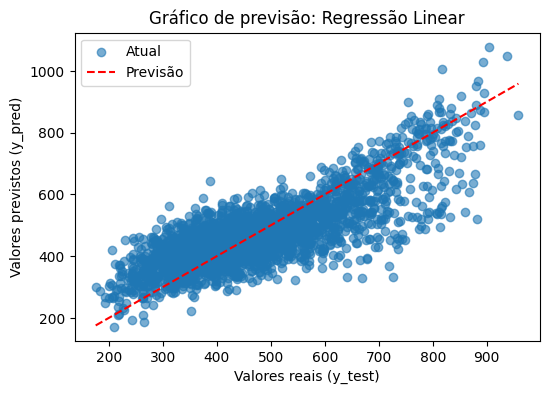

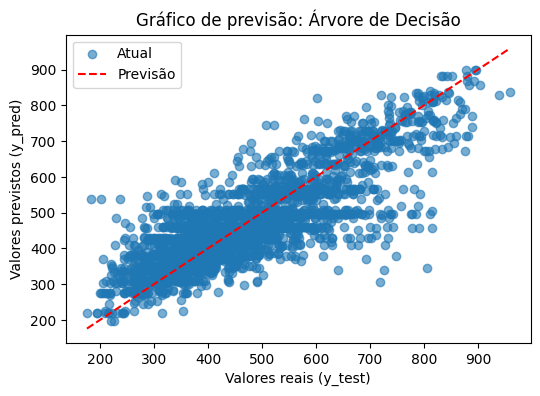

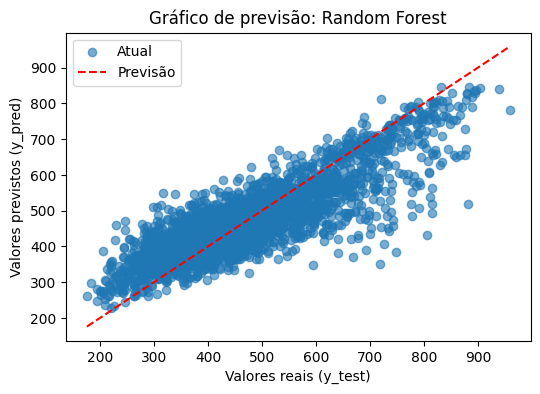

In [ ]:
# Plotando gráficos de previsão e resíduos para cada modelo
for nome, modelo in modelos.items():

    # Previsões
    y_pred = modelo.predict(x_test)

    # Gráfico de Previsão
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
    plt.title(f"Gráfico de previsão: {nome}")
    plt.xlabel("Valores reais (y_test)")
    plt.ylabel("Valores previstos (y_pred)")
    plt.grid(False)
    plt.legend(["Atual", "Previsão"])
    plt.show()

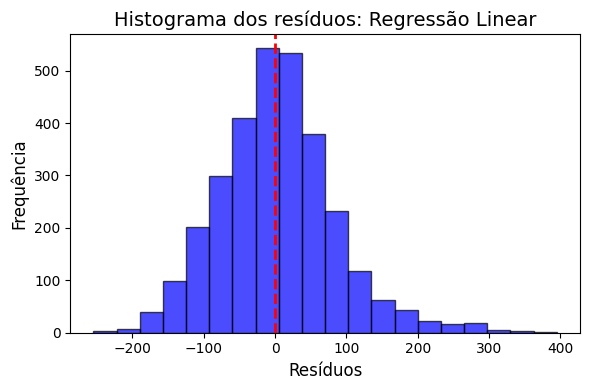

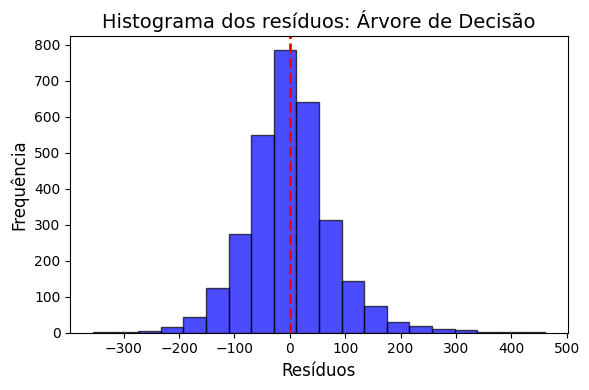

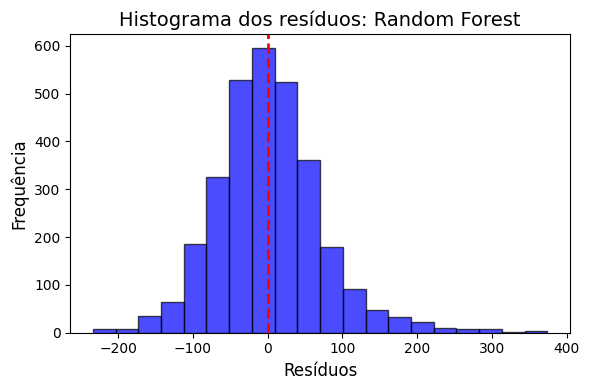

In [ ]:
# Gráfico de Resíduos dos modelo

for nome, modelo in modelos.items():
    # Prever os valores no conjunto de teste
    y_pred = modelo.predict(x_test)

    # Calcular resíduos
    residuos = y_test - y_pred

    # Histograma dos resíduos
    plt.figure(figsize=(6, 4))
    plt.hist(residuos, bins=20, color="blue", alpha=0.7, edgecolor="k")
    plt.axvline(0, color="red", linestyle="--", linewidth=2)
    plt.title(f"Histograma dos resíduos: {nome}", fontsize=14)
    plt.xlabel("Resíduos", fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


# **Feature importances**

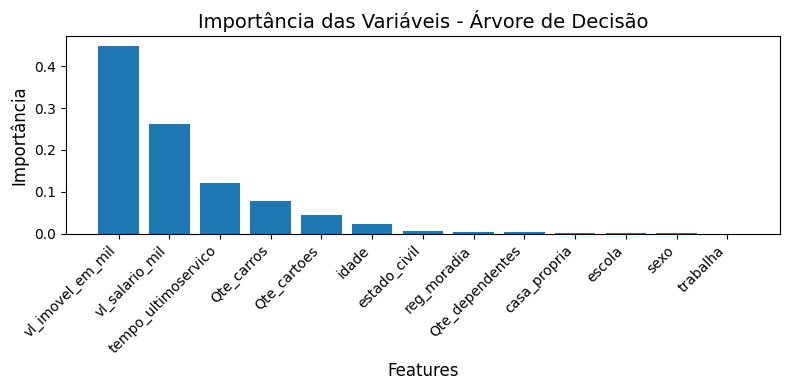

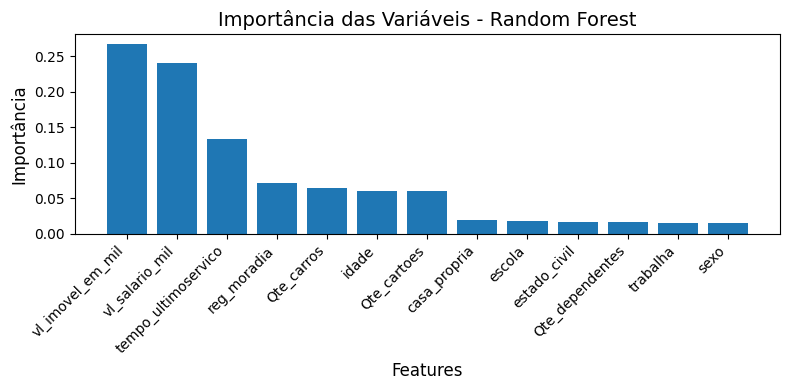

In [ ]:
# Plotando a importância das features para modelos
for nome, modelo in modelos.items():

    if hasattr(modelo, "feature_importances_"):

        # Importância das variáveis
        feature_importances = modelo.feature_importances_
        features = x_train.columns  # Nomes das colunas de entrada
        indices = np.argsort(feature_importances)[::-1]

        # Plotar gráfico de barras
        plt.figure(figsize=(8, 4))
        plt.bar(range(len(features)), feature_importances[indices], align="center")
        plt.xticks(range(len(features)), features[indices], rotation=45, ha="right")
        plt.title(f"Importância das Variáveis - {nome}", fontsize=14)
        plt.xlabel("Features", fontsize=12)
        plt.ylabel("Importância", fontsize=12)
        plt.tight_layout()
        plt.show()

# **Métricas e avaliação do modelo**

In [ ]:
# Dicionário para armazenar as métricas de cada modelo
metricas = []

# Loop para treinar, prever e calcular as métricas
for nome, modelo in modelos.items():

    # Fazer previsões
    y_pred = modelo.predict(x_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5  # Raiz do Erro Quadrático Médio
    mape = (abs((y_test - y_pred) / y_test).mean()) * 100  # Mean Absolute Percentage Error
    r2 = r2_score(y_test, y_pred)

    # Armazenar as métricas no dicionário
    metricas.append({"Modelo": nome,
                     "MAE": mae,
                     "MSE": mse,
                     "RMSE": rmse,
                     "MAPE (%)": mape,
                     "R²": r2})

# Visualizando os resultados
df_metricas = pd.DataFrame(metricas)
df_metricas

,Modelo,MAE,MSE,RMSE,MAPE (%),R²
0,Regressão Linear,62.481209,6787.573510,82.386731,14.295796,0.621309
1,Árvore de Decisão,57.722926,6161.153586,78.493016,13.125507,0.656258
2,Random Forest,53.277520,5138.295784,71.681907,12.159201,0.713325


In [ ]:
# Adicionando previsões de cada modelo ao DataFrame original
df_resultados = x_test.copy()  # Copiar o conjunto de teste para preservar as colunas originais
df_resultados['SCORE_REAL'] = y_test  # Adicionar os valores reais do target

# Loop para adicionar as previsões de cada modelo
for nome, modelo in modelos.items():
    y_pred = modelo.predict(x_test)  # Previsões do modelo
    df_resultados[f'PREVISAO_{nome}'] = y_pred  # Adicionar coluna com previsões

In [ ]:
# Visualizando dataset
df_resultados[['SCORE_REAL', 'PREVISAO_Regressão Linear', 'PREVISAO_Árvore de Decisão', 'PREVISAO_Random Forest']].head(n=10)

,SCORE_REAL,PREVISAO_Regressão Linear,PREVISAO_Árvore de Decisão,PREVISAO_Random Forest
3781,372.0,421.009897,407.775325,435.557964
2922,519.0,468.921546,507.954054,479.873204
5070,443.0,452.666007,485.212121,534.898838
7246,631.8,561.401498,603.220000,615.366601
623,306.0,474.079937,497.283527,471.062764
3931,418.0,491.938952,369.939394,385.555364
4767,422.0,411.337025,425.030000,423.235243
7094,597.0,417.272218,450.485315,464.846385
3282,694.8,648.369109,673.582759,593.736768
3994,610.0,435.191255,564.557407,553.126355


In [ ]:
# Salvar o DataFrame no arquivo CSV
output_file = "resultados_modelos2.csv"
df_resultados.to_csv(output_file, index=False)

# **Simulador de score (para novos clientes)**

In [ ]:
# Usando modelo Random Forest
modelo = modelos["Random Forest"]

In [ ]:
# Função para criar score novo cliente
def simular_score_novo_cliente(model, novo_cliente: dict, label_encoders, cat_cols, scaler=None):
    """
    Simula o score de crédito para um novo cliente com base no modelo treinado.
    """
    # Converter o dicionário em DataFrame
    df_novo = pd.DataFrame([novo_cliente])

    # Aplicar Label Encoding nas colunas categóricas
    for col in cat_cols:
        if col in df_novo.columns:

            # Adicionar valores inéditos ao encoder, se necessário
            valores_novos = set(df_novo[col].astype(str)) - set(label_encoders[col].classes_)
            if valores_novos:

                # Adiciona dinamicamente os valores inéditos
                label_encoders[col].classes_ = np.append(label_encoders[col].classes_, list(valores_novos))

            # Transformar os valores
            df_novo[col] = label_encoders[col].transform(df_novo[col].astype(str))

    # Aplicar escalonamento, se necessário
    if scaler:
        df_novo = scaler.transform(df_novo)

    # Fazer a previsão
    pred = model.predict(df_novo)
    return pred[0]  # Retorna o valor previsto

# Colunas categóricas
cat_cols = ['sexo',
            'estado_civil',
            'escola',
            'trabalha',
            'reg_moradia',
            'casa_propria']

# Criar os encoders
label_encoders = {col: LabelEncoder().fit(x_train[col].astype(str)) for col in cat_cols}

# Aplicar encoding nos dados de treino/teste
for col in cat_cols:
    x_train[col] = label_encoders[col].transform(x_train[col].astype(str))
    x_test[col] = label_encoders[col].transform(x_test[col].astype(str))

for col, encoder in label_encoders.items():
    print(f"Coluna: {col}, Classes conhecidas: {encoder.classes_}")

Coluna: sexo, Classes conhecidas: ['0' '1']
Coluna: estado_civil, Classes conhecidas: ['0' '1' '2' '3']
Coluna: escola, Classes conhecidas: ['0' '1' '2' '3' '4']
Coluna: trabalha, Classes conhecidas: ['0' '1']
Coluna: reg_moradia, Classes conhecidas: ['1' '2' '3' '4' '5' '6']
Coluna: casa_propria, Classes conhecidas: ['0' '1']


In [ ]:
# Novo cliente
novo_cliente = {"idade": 30,
                "sexo": "M",
                "estado_civil": "Solteiro",
                "escola": "Graduacao",
                "Qte_dependentes": 1,
                "tempo_ultimoservico": 6,
                "trabalha": "Sim",
                "vl_salario_mil": 3.5,
                "reg_moradia": "Urbano",
                "casa_propria": "Nao",
                "vl_imovel_em_mil": 0,
                "Qte_cartoes": 1,
                "Qte_carros": 0,
                }

# Simular score com o modelo Random Forest
score_pred = simular_score_novo_cliente(modelo, novo_cliente, label_encoders, cat_cols)
print("Score para credito")
print(f"Score de crédito previsto: {score_pred:.2f}")

Score para credito
Score de crédito previsto: 277.61


# **Modelo Turing**

## **GridSearchCV Decision Tree**

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Modelo base
modelo_decision_tree = DecisionTreeRegressor(random_state=42)

# Grade refinada de hiperparâmetros
param_grid_decision_tree = {'max_depth': [6, 8, 10, 12, 15, None],
                            'min_samples_split': [2, 3, 5, 10],
                            'min_samples_leaf': [1, 2, 3, 5],
                            'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
                            }

# GridSearchCV
grid_search = GridSearchCV(estimator=modelo_decision_tree,
                           param_grid=param_grid_decision_tree,
                           cv=10,  # Mais folds para validação cruzada
                           scoring='r2',  # Métrica para avaliação
                           n_jobs=-1,  # Paralelismo
                           verbose=1  # Mostrar o progresso
                           )

# Ajustar o modelo
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


In [ ]:
# Obter os melhores parâmetros
melhores_parametros = grid_search.best_params_
melhor_r2_cv = grid_search.best_score_

print("\nMelhores Hiperparâmetros:")
print(melhores_parametros)
print(f"Melhor R² no Cross-Validation: {melhor_r2_cv:.4f}")

In [ ]:
# Modelo otimizado com os melhores parâmetros
modelo_otimizado = DecisionTreeRegressor(random_state=42, **melhores_parametros)

# Treinar o modelo no conjunto de treino
modelo_otimizado.fit(x_train, y_train)

In [ ]:
# Avaliar o desempenho no conjunto de teste
y_pred = modelo_otimizado.predict(x_test)

In [ ]:
# Calcular os resíduos
residuos = y_test - y_pred

In [ ]:
# Gráfico de Valores Reais vs. Previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Linha Perfeita')

# Melhorias no gráfico
plt.title("Modelo Árvore de Decisão - Valores Reais vs. Previstos", fontsize=14)
plt.xlabel("Valores Reais (y_test)", fontsize=12)
plt.ylabel("Valores Previstos (y_pred)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(visible=False)
plt.tight_layout()
plt.show()

In [ ]:
# Gráfico de Resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)

# Melhorias no gráfico
plt.title("Gráfico de Resíduos - Modelo Árvore de Decisão", fontsize=14)
plt.xlabel("Valores Previstos (y_pred)", fontsize=12)
plt.ylabel("Resíduos (y_test - y_pred)", fontsize=12)
plt.grid(visible=False)
plt.tight_layout()
plt.show()

In [ ]:
# Avaliar no conjunto de teste
mse_teste = mean_squared_error(y_test, y_pred)
r2_teste = r2_score(y_test, y_pred)

print("\nDesempenho no Conjunto de Teste:")
print(f"MSE: {mse_teste:.2f}")
print(f"R²: {r2_teste:.4f}")